In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

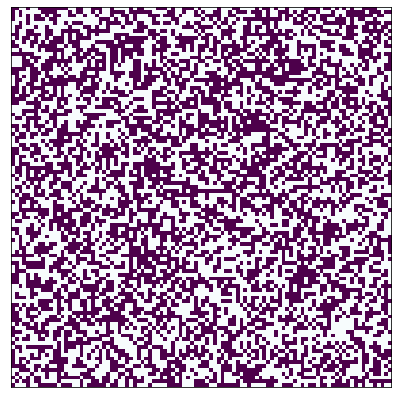

In [18]:
import ising
spins = ising.spinLattice(100)
spins.plot()

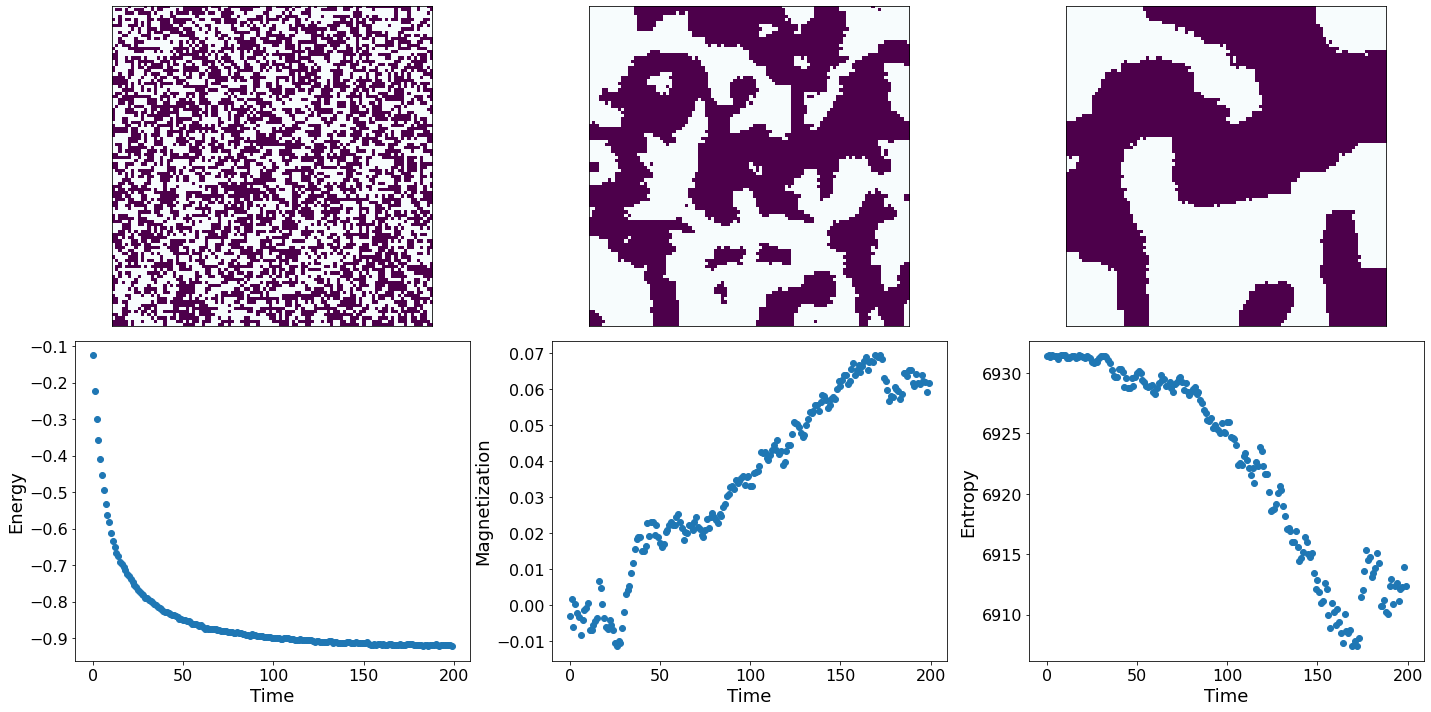

In [8]:
plt.figure(figsize=(20, 10))
e, m, s = [], [], []
N = 200

# Randomize the state (loose memory of previous steps)
spins.randomize()

for i in range(N):
    
    # Make the spin lattice evolve
    spins.thermalEvolution(0.1)
    
    if i == 0:
        plt.subplot(2, 3, 1)
        spins.plot()
    
    if i == int(N/5):
        plt.subplot(2, 3, 2)
        spins.plot() 
    
    if i == N-1:
        plt.subplot(2, 3, 3)
        spins.plot()
    
    # Store all results
    e.append(spins.energy())
    m.append(spins.magnetization())
    s.append(spins.entropy())

plt.subplot(2, 3, 4)
plt.plot(e, 'o')
plt.xlabel('Time')
plt.ylabel('Energy')

plt.subplot(2, 3, 5)
plt.plot(m, 'o')
plt.xlabel('Time')
plt.ylabel('Magnetization')

plt.subplot(2, 3, 6)
plt.plot(s, 'o')
plt.xlabel('Time')
plt.ylabel('Entropy')

plt.tight_layout();

In [10]:
t, e, m, s = spins.simulatePhaseTransition(nT=100)

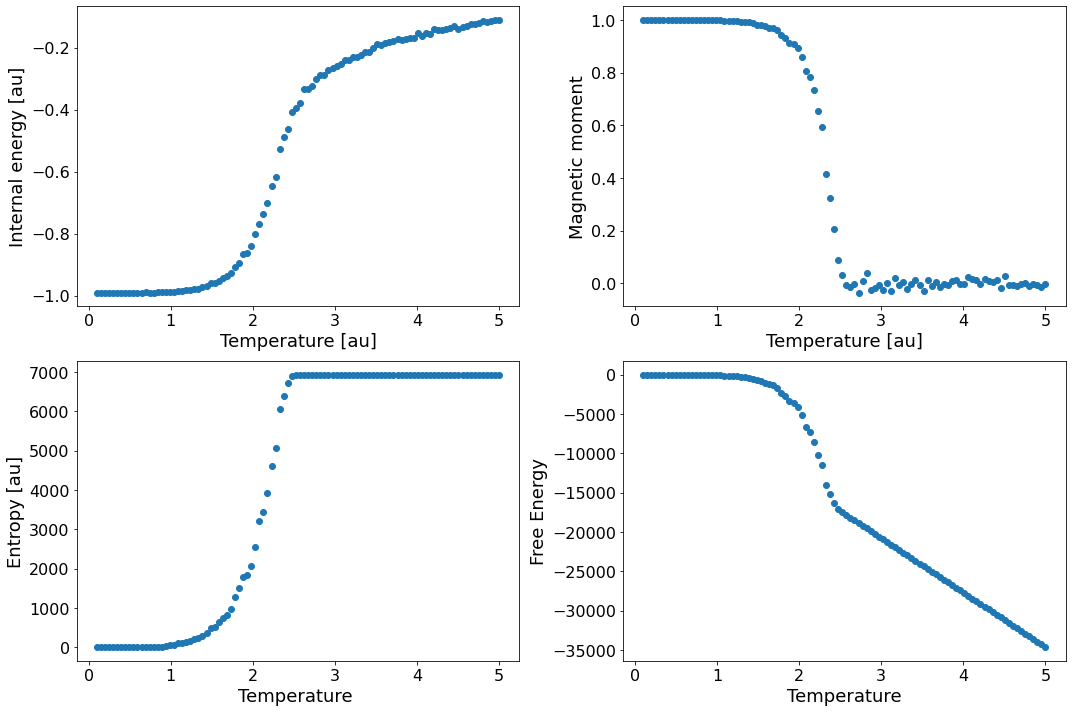

In [11]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(t, e, 'o')
plt.xlabel('Temperature [au]')
plt.ylabel('Internal energy [au]')

plt.subplot(2, 2, 2)
plt.plot(t, np.array(m), 'o')
plt.xlabel('Temperature [au]')
plt.ylabel('Magnetic moment');

plt.subplot(2, 2, 3)
plt.plot(t, s, 'o')
plt.xlabel('Temperature ')
plt.ylabel('Entropy [au]')

plt.subplot(2, 2, 4)
plt.plot(t, e - t*s, 'o')
plt.xlabel('Temperature')
plt.ylabel('Free Energy')

plt.tight_layout()

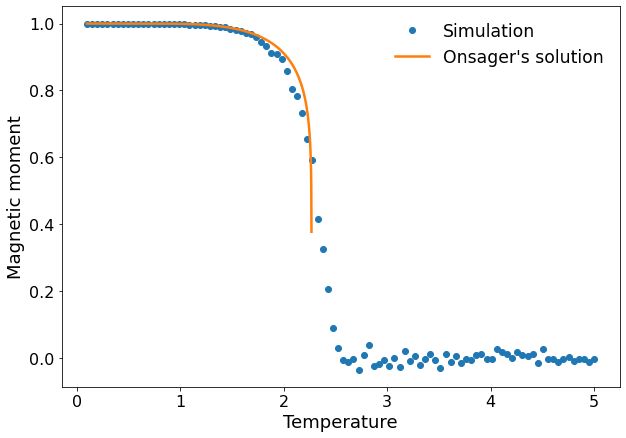

In [12]:
# Adding Onsager analystical solution
def onsagerSolution(T):
    return ( 1 - 1./np.sinh(2/T)**4 ) ** (1./8.)

Tcont = np.linspace(0.1, 2.269, 1000)
plt.plot(t, np.array(m), 'o', label='Simulation')
plt.xlabel('Temperature')
plt.ylabel('Magnetic moment');
plt.plot(Tcont, onsagerSolution(Tcont), label='Onsager\'s solution')
plt.legend();

In [19]:
s = ising.spinLattice(50)

Rs, Gs, Ts = [], [], [0.5, 1., 2, 2.269, 2.37, 3, 4]
for T in Ts:
    
    # Randomize the spin confiration, loosing memory
    s.randomize()

    # Compute 2 points correlation function
    r, g = s.twoPtsCorr(T, nEvolution=10000)

    # Store the results
    Rs.append(r)
    Gs.append(g)
    Ts.append(T)

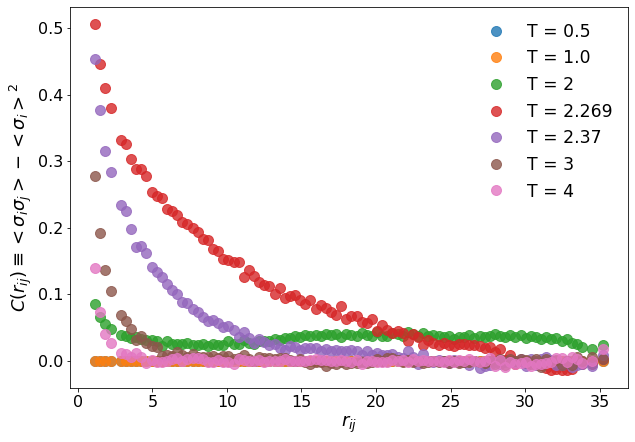

In [20]:
for r, g, T in zip(Rs, Gs, Ts):
    # Plot the results
    gAve, binsEdges, binNumber = stats.binned_statistic(r, g, statistic='mean', bins=100)
    rAve = (binsEdges[1:] + binsEdges[:-1])/2.0
    plt.plot(rAve, gAve, marker='o', markersize=10, linewidth=0, alpha=0.8, label='T = {}'.format(T))

plt.xlabel('$r_{ij}$')
plt.ylabel('$C(r_{ij}) \\equiv <\\sigma_{i}\\sigma_{j}> - <\\sigma_{i}>^{2}$')
plt.legend();